# Návod použití
## Google Colab
Pokud se nacházíte v rozhraní Google Colab, složka "DMP_Neuronove_site", ve které se nachází tento notebook, program "custom_ann.py" a model "keras_gtsrb_model.h5", by se měla na Vašem Google Disku nacházet ve výchozí složce "Můj Disk". 

všechny buňky lze naráz spustit pomocí "Běh -> Spustit vše" v horní liště. Samostatné buňky lze spustit pomocí kliknutím na danou buňku a klávesami "Ctrl+Enter". 

Chvilku možná bude trvat, než se notebook připojí k běhovému prostředí, které doporučuji nastavit na vzdálenou GPU pomocí "Běh -> Zvolit běhové prostředí -> GPU".

Program v určité části požádá o přístup k Vašemu Google Disku, aby mohl naimportovat neuronovou síť ze souboru "custom_cnn.py". Pokud povolíte, zbytek programu by měl proběhnout bez problému. Pokud se po udělení přístupu notebook zasekne, odpojte a smažte běh pomocí "Běh -> Odpojit a smazat běh" a spusťte manuálně buňku po buňce.

## Jiné rozhraní
Pokud se nacházíte v jiném rozhraní, pak zakomentujte nebo smažte všechny řádky kódu okomentované "# Pro Colab" a ujistěte se, že všechny použité knihovny máte nainstalované na počítači nebo ve Vašem virtuálním prostředí.

Pro správnou funkci musíte být připojeni k internetu, protože datový soubor GTSRB je nahráván z cloudové databáze knihovny Deeplake.

In [1]:
!pip install deeplake # Pro Colab

import deeplake
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive # Pro Colab

drive.mount('/content/gdrive') # Pro Colab
keras_model = tf.keras.models.load_model('/content/gdrive/My Drive/DMP_Neuronove_site/keras_gtsrb_model.h5') # Pro Colab
# keras_model = tf.keras.models.load_model('keras_gtsrb_model.h5') # Pro jiné rozhraní

data = deeplake.load("hub://activeloop/gtsrb-test")
X = []
X_original = []
for image in data.images:
    image = image.numpy()
    X_original.append(image)
    image = cv2.resize(image, (30, 30))
    X.append(image)
X = np.array(X) / 255

y = np.array(data.labels.numpy().reshape(1,len(data.labels.numpy()))[0])

class_names = data.labels.info.class_names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 

In [ ]:
data.visualize()

HINT: Please forward the port - 55059 to your local machine, if you are running on the cloud.
 * Serving Flask app 'dataset_visualizer'


 * Debug mode: off


Vyberte index snímku (0-7356): 3316
1/1 [==============================] - 0s 481ms/step


Text(0.5, 1.0, 'Správné označení: priority_road_sign\n Predikce: priority_road_sign')

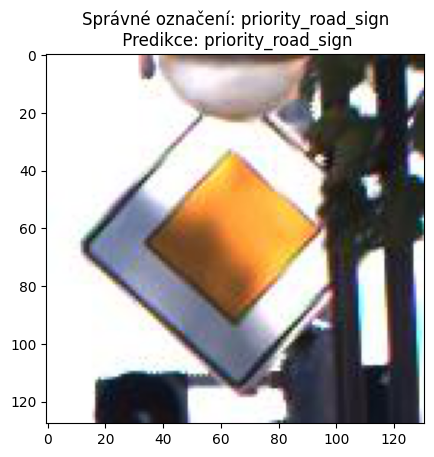

In [2]:
index = input("Vyberte index snímku (0-7356): ")
while not index.isdigit():
  print("Vložená hodnota není integer.")
  index = input("Vyberte index snímku (0-7356): ")
while int(index) not in range(0, len(data)):
  print("Vložená hodnota je mimo rozsah")
  index = input("Vyberte index snímku (0-7356): ")
index = int(index)

prediction = keras_model.predict(X[None, index]).argmax()
plt.imshow(X_original[index])
plt.title(f"Správné označení: {class_names[y[index]]}\n Predikce: {class_names[prediction]}")